In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import matplotlib.pyplot as plt
import halma as h
import numpy as np
import game_tree as g
import imageio
from matplotlib.animation import FuncAnimation
from IPython.display import HTML



In [14]:
game = h.Halma(h.get_board())
moves = game.get_available_moves(1)


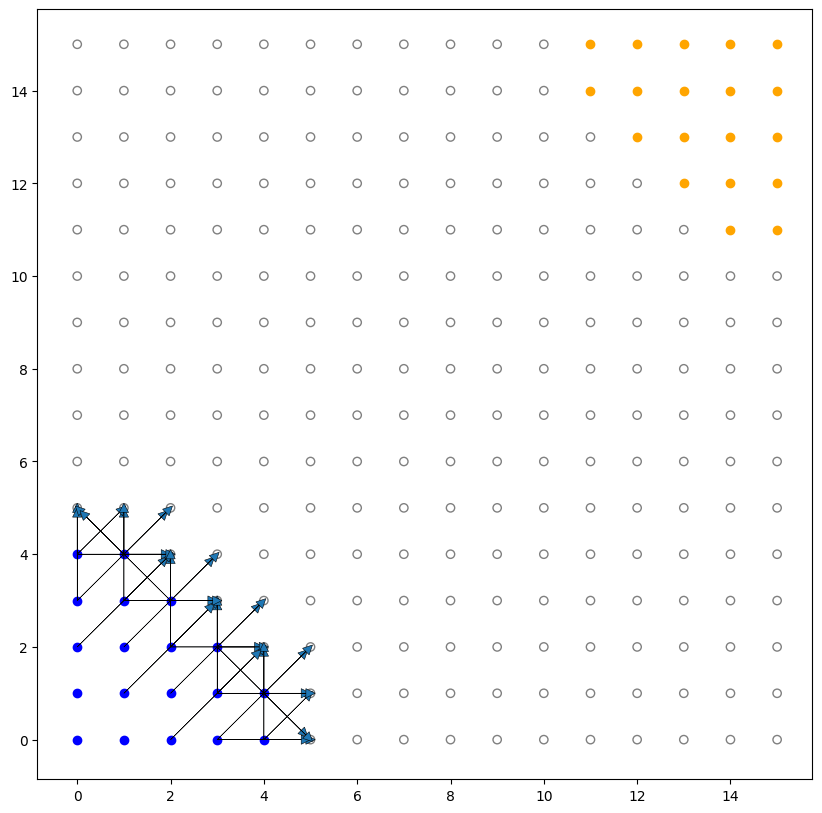

In [15]:
import random
def draw_board(board, alpha=1):
    for i in range(len(board)):
        for j, v in enumerate(board[i]):
            if v == 0:
                plt.scatter(i,j, facecolors='none', color = 'gray', alpha=alpha)
            elif v == 1:
                plt.scatter(i,j,  color = 'blue', alpha=alpha)
            else:
                plt.scatter(i,j,  color = 'orange', alpha=alpha)

def draw_moves(moves):
    for move in moves:
        xs, ys = move.src 
        xd, yd = move.dest
        offset = 0
        plt.arrow(xs+offset, ys+offset, 0.9*(xd-xs), 0.9*(yd-ys), head_width=0.2, head_length=0.2, linewidth=0.4)

plt.figure(figsize=(10,10))
draw_board(game.game_state.board)

draw_moves(moves)



In [16]:
game.make_move(moves[0])


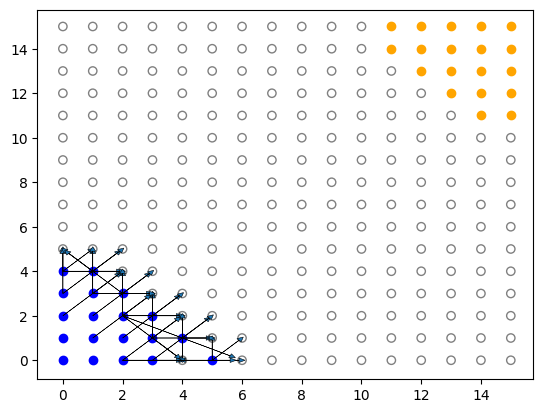

In [17]:
draw_board(game.game_state.board)
moves = game.get_available_moves(1)
draw_moves(moves)


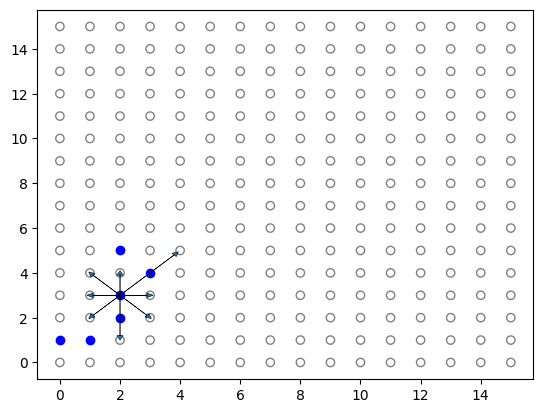

In [18]:
import halma as h
board = np.zeros(shape=(16,16), dtype=np.int8)
board[2,2] = 1
board[2,3] = 1
board[3,4] = 1
board[2,5] = 1
board[1,1] = 1
board[0,1] = 1
g2 = h.Halma(board)
#print(len()
moves  = g2.get_pawn_moves((2,3), board=g2.game_state.board)

draw_board(g2.game_state.board)
draw_moves(moves)

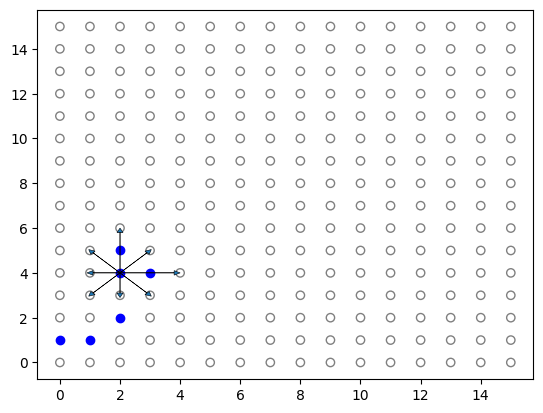

In [19]:
g2.make_move(moves[0])
draw_board(g2.game_state.board)
moves = g2.get_pawn_moves(moves[0].dest, g2.game_state.board)
draw_moves(moves)

In [20]:
def anim(g: h.Halma, path, p, frames=20, out_name="game.gif"):
    def klatka(moves, board, filename):
        draw_board(board)
        draw_moves(moves)
        plt.savefig(filename)
        plt.close()

    initial_move = h.Move(src=None, dest=p)
    moves = [initial_move]
    prev_m = None
    images = []
    for i in range(frames):
        filename = f"{path}_{i}.png"
        moves = g.get_available_moves(1)
        move = random.choice(moves)
        plt.scatter(move.dest[0], move.dest[1], facecolors='none', color = 'red', s=2, alpha=0.5)
        klatka(filter(lambda m: m.src == move.src, moves), g.game_state.board, filename)
        images.append(imageio.imread(filename))
        g.make_move(move)
        prev_m = move
        

    imageio.mimsave(out_name, images, fps=1, loop=4)


In [21]:
def anim_game_tree(gt: g.GameTree, path, frames=20, out_name="game.gif", depth=2):
    def klatka(moves, board, filename):
        draw_board(board)
        draw_moves(moves)
        plt.savefig(filename)
        plt.close()

    images = []
    is_max_agent = True
    for i in range(frames):
        filename = f"{path}_{i}.png"
        win_condition, move = gt.alpha_beta_pruning(
                g.Node(None, gt.halma.game_state),
                depth,
                is_max_agent
        )
        is_max_agent = not is_max_agent
        klatka([move], gt.halma.game_state.board, filename)
        gt.halma.make_move(move)
        images.append(imageio.imread(filename))
    
    imageio.mimsave(out_name, images, fps=1, loop=4)




C:\Users\dawid\AppData\Local\Temp\ipykernel_2804\2101099911.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


KeyboardInterrupt: 

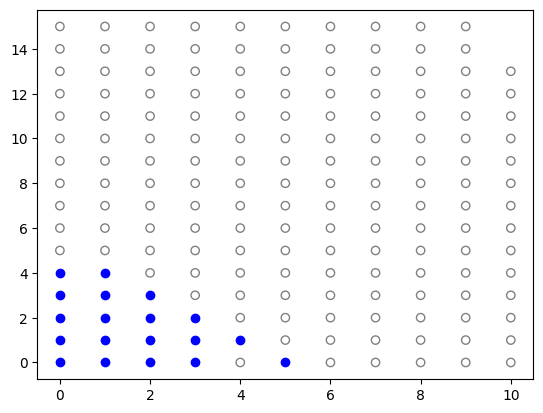

In [22]:
gt = g.GameTree(h.Halma(h.get_board()))
anim_game_tree(gt, path='imgs/plot', depth=2, frames=20)